# trim_saddle_points
``trim_saddle_points`` function is a filter which removes peaks that were mistakenly identified because they lie on a saddle or a ridge in the distance transform.

## Import Packages

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage
from edt import edt

## Generate Image
A test image of shape 200 by 200 is generated using the blobs generator. The morphology is anisotropic and porosity is 0.65.  The test image is then visualized by plotting using matplotlib's ``imshow``.

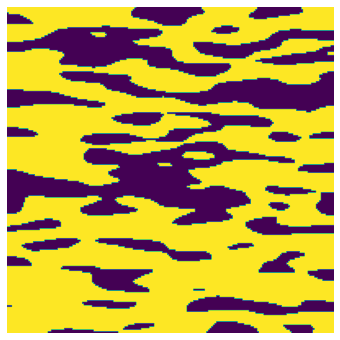

In [2]:
im = ps.generators.blobs(shape=[200, 200], blobiness=[2, .5], porosity=0.65)

plt.figure(figsize=[6, 6]);
plt.axis(False);
plt.imshow(im);

## Apply Filter
First the distance transform of the image is determined using the ``edt`` method. Then the distance transform is supplied to the filter ``find_peaks`` and peaks is returned.

In [3]:
dt = edt(im)
peaks = ps.filters.find_peaks(dt, r_max=4)

Peaks determined above is supplied to the ``trim_saddle_points`` filter and an image with fewer peaks is returned. The result is visualized comparing the locations of the peaks before the saddle points are removed to after. The yellow dots in the visualized image correspond to a peak.

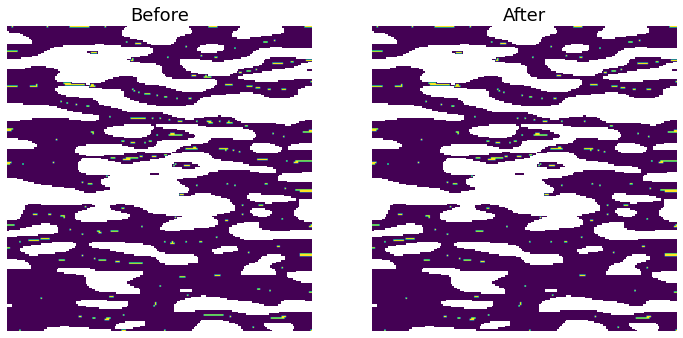

In [4]:
x = ps.filters.trim_saddle_points(peaks=peaks, dt=dt)

fix, ax = plt.subplots(1, 2, figsize=[12, 12])
ax[0].axis(False)
ax[0].imshow(peaks/im)
ax[0].set_title('Before', fontdict={'fontsize': 18});
ax[1].axis(False)
ax[1].imshow(x/im);
ax[1].set_title('After', fontdict={'fontsize': 18});